# Python - `SymPy`,  and $\LaTeX$

In [8]:
%matplotlib inline

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Symbolic Mathematics (`SymPy`)

In [2]:
sp.init_printing()     # Turns on pretty printing

In [3]:
np.sqrt(8)

In [4]:
sp.sqrt(8)

## You have to explicitly tell `SymPy` what symbols you want to use.

In [5]:
x, y, z  = sp.symbols('x y z')

## Expressions are then able use these symbols

In [6]:
my_equation = 2 * x + y
my_equation

In [7]:
my_equation + 3

In [8]:
my_equation - x

In [9]:
my_equation / x

## `SymPy` has all sorts of ways to manipulates symbolic equations

In [10]:
sp.simplify(my_equation / x)

In [11]:
another_equation = (x + 2) * (x - 3)
another_equation

In [12]:
sp.expand(another_equation)

In [13]:
long_equation = 2*y*x**3 + 12*x**2 - x + 3 - 8*x**2 + 4*x + x**3 + 5 + 2*y*x**2 + x*y
long_equation

In [14]:
sp.collect(long_equation,x)

In [15]:
sp.collect(long_equation,y)

## And solve equations - `solve`

In [16]:
yet_another_equation = 2 * x**2 - 5 * x + 30

yet_another_equation

In [17]:
sp.solve(yet_another_equation,x)

## Calculus

In [18]:
yet_another_equation

In [19]:
sp.diff(yet_another_equation,x)

In [20]:
sp.diff(yet_another_equation,x,2)

In [21]:
sp.integrate(yet_another_equation,x)

In [22]:
sp.integrate(yet_another_equation,(x,0,5))   # limits x = 0 to 5

## Taylor Expansions

In [23]:
still_another_equation = sp.sin(x) * sp.exp(-x)
still_another_equation

In [24]:
sp.series(still_another_equation, x)

In [25]:
sp.series(still_another_equation, x, x0 = 0, n = 8)

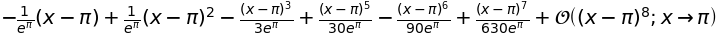

In [26]:
sp.series(still_another_equation, x, x0 = sp.pi, n = 8)

## Limits

$$\lim _{x\to \infty }\left(1+{\frac {1}{x}}\right)^{x}$$

In [27]:
limit_equation = (1 + (1 / x)) ** x

limit_equation

In [28]:
sp.limit(limit_equation, x, sp.oo)      # sp.oo = infinity

## System of equations

$$
\begin{array}{c}
x + 3y + 5z = 10 \\
2x + 5y + z = 8 \\
2x + 3y + 8z = 3 \\
\end{array}
\hspace{3cm}
\left[
\begin{array}{ccc}
1 & 3 & 5 \\
2 & 5 & 1 \\
2 & 3 & 8 
\end{array}
\right]
\left[
\begin{array}{c}
x\\
y\\
z 
\end{array}
\right]
=
\left[
\begin{array}{c}
10\\
8\\
3 
\end{array}
\right]
$$

In [29]:
AA = sp.Matrix([[1,3,5],[2,5,1],[2,3,8]])
bb = sp.Matrix([[10],[8],[3]])

In [30]:
AA, bb

⎛⎡1  3  5⎤  ⎡10⎤⎞
⎜⎢       ⎥  ⎢  ⎥⎟
⎜⎢2  5  1⎥, ⎢8 ⎥⎟
⎜⎢       ⎥  ⎢  ⎥⎟
⎝⎣2  3  8⎦  ⎣3 ⎦⎠

In [31]:
AA**-1

⎡-37           22  ⎤
⎢────  9/25    ──  ⎥
⎢ 25           25  ⎥
⎢                  ⎥
⎢ 14               ⎥
⎢ ──   2/25   -9/25⎥
⎢ 25               ⎥
⎢                  ⎥
⎣4/25  -3/25  1/25 ⎦

In [32]:
AA**-1 * AA

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [33]:
AA**-1 * bb

⎡-232 ⎤
⎢─────⎥
⎢  25 ⎥
⎢     ⎥
⎢ 129 ⎥
⎢ ─── ⎥
⎢  25 ⎥
⎢     ⎥
⎢ 19  ⎥
⎢ ──  ⎥
⎣ 25  ⎦

## General Equation Solving - `nsolve`

$$
\large y_1 = 10\,\sin(5x) \ e^{-x}\\
\large y_2 = 6 - e^{0.75x}
$$

### Where do they cross? - The graph

In [34]:
my_x = np.linspace(0,2*np.pi,100)

In [35]:
my_y1 = 10 * np.sin(5*my_x) * np.exp(-my_x)
my_y2 = 6 - np.exp(0.75 * my_x)

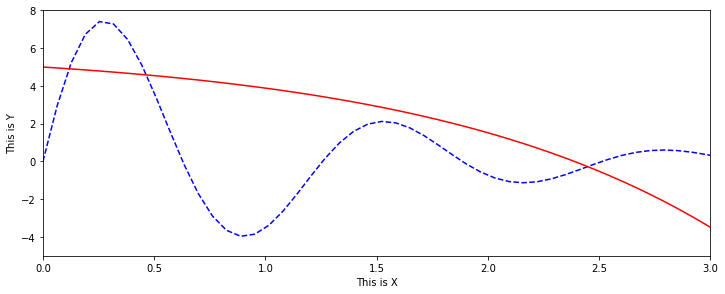

In [36]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,4)

fig.tight_layout()

ax.set_ylim(-5,8)
ax.set_xlim(0,3)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_x, my_y1, color='b', marker='None', linestyle='--')
ax.plot(my_x, my_y2, color='r', marker='None', linestyle='-');

### Where do they cross? - The `sympy` solution

In [37]:
equation_one = 10 * sp.sin(5*x) * sp.exp(-x)
equation_two = 6 - sp.exp(0.75 * x)

In [38]:
equation_one, equation_two

In [39]:
my_guess = 0.5

sp.nsolve(equation_one - equation_two, x, my_guess)

In [40]:
all_guesses = (0.1, 0.5, 2.5)

for i in all_guesses:
    result = sp.nsolve(equation_one - equation_two, x, i)
    print(result)

0.116878818782211
0.464810116700917
2.44864067084146


### Your guess has to be (somewhat) close or the solution will not converge:

In [41]:
my_guess = 200

sp.nsolve(equation_one - equation_two, x, my_guess)

ValueError: Could not find root within given tolerance. (1.34097e+112 > 2.1684e-19)
Try another starting point or tweak arguments.

## Solve ODE Equations - `dsolve`

In [42]:
f = sp.Function('f')

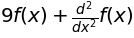

In [43]:
equation_ode = sp.Derivative(f(x), x, x) + 9*f(x)

equation_ode

In [44]:
sp.dsolve(equation_ode, f(x))

# `SymPy` can do *so* much more. It really is magic. 

## Complete documentation can be found [here](http://docs.sympy.org/latest/index.html)

---

# $\LaTeX$

## Python uses the $\LaTeX$ language to typeset equations.

* ## [Latex Symbols](https://en.wikipedia.org/wiki/Wikipedia:LaTeX_symbols)

* ## [Latex draw symbols](http://detexify.kirelabs.org/classify.html)

### Use a single set of `$` to make your $\LaTeX$ inline and a double set `$$` to center

### This code will produce the output:

### $$ \int \cos(x)\ dx = \sin(x) $$

## Use can use $\LaTeX$ in plots:

In [45]:
plt.style.use('ggplot')

my_a = np.linspace(0,2*np.pi,100)
my_b = np.sin(5*my_a) * np.exp(-my_a)

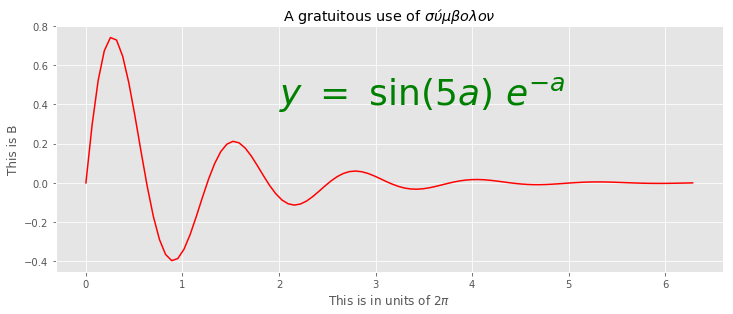

In [46]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,4)

fig.tight_layout()

ax.plot(my_a, my_b, color='r', marker='None', linestyle='-');

ax.set_title("A gratuitous use of $σύμβολον$")
ax.set_xlabel("This is in units of 2$\pi$")
ax.set_ylabel("This is B")

ax.text(2.0, 0.4, '$y\ =\ \sin(5a)\ e^{-a}$', color='green', fontsize=36);

## Use can use `SymPy` to make $\LaTeX$ equations for you!

In [47]:
a =  1/( ( z + 2 ) * ( z + 1 ) )

print(sp.latex(a))

\frac{1}{\left(z + 1\right) \left(z + 2\right)}


$$ \frac{1}{\left(z + 1\right) \left(z + 2\right)} $$

In [48]:
print(sp.latex(sp.Integral(z**2,z)))

\int z^{2}\, dz


$$ \int z^{2}\, dz $$

## `Astropy` can output $\LaTeX$ tables

In [49]:
from astropy.io import ascii
from astropy.table import QTable

In [50]:
my_table = QTable.read('./MyData/Zodiac.csv', format='ascii.csv')

In [51]:
my_table[0:3]

Name,Sym,RA,Dec,Flag
str11,str3,float64,float64,str2
Aquarius,AQR,22.40784,-10.15606,ZA
Aries,ARI,2.66237,19.95906,ZA
Cancer,CNC,8.68322,19.1894,ZA


In [52]:
ascii.write(my_table, format='latex')

\begin{table}
\begin{tabular}{ccccc}
Name & Sym & RA & Dec & Flag \\
Aquarius & AQR & 22.40784 & -10.15606 & ZA \\
Aries & ARI & 2.66237 & 19.95906 & ZA \\
Cancer & CNC & 8.68322 & 19.1894 & ZA \\
Capricornus & CAP & 21.02258 & -18.55051 & ZA \\
Gemini & GEM & 7.15585 & 23.25312 & ZA \\
Leo & LEO & 10.6933 & 14.78016 & ZA \\
Libra & LIB & 15.22447 & -15.15893 & ZA \\
Ophiuchus & OPH & 17.30225 & -5.21711 & ZA \\
Pisces & PSC & 0.64826 & 10.77037 & ZA \\
Sagittarius & SGR & 19.18492 & -27.09177 & ZA \\
Scorpius & SCO & 16.79026 & -31.81767 & ZA \\
Taurus & TAU & 4.42213 & 16.83941 & ZA \\
Virgo & VIR & 13.28989 & -2.63866 & ZA \\
\end{tabular}
\end{table}


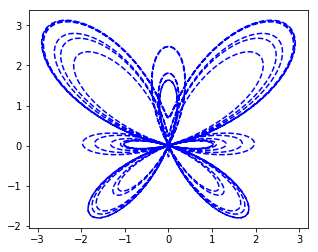

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [34]:
t = np.linspace(0,12*np.pi,2000)
x = np.sin(t)*(np.exp(np.cos(t)) - 2*np.cos(4*t) - (np.sin(t/12))**5)
y = np.cos(t)*(np.exp(np.cos(t)) - 2*np.cos(4*t) - (np.sin(t/12))**5)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,4)
ax.plot(x,y, color='b', marker='None', linestyle='--')

plt.show()
ax.savefig('butterfly.pdf')
ax.savefig('butterfly.png')

In [ ]:
plt.figure(figsize=(5.8, 3.0))

t = np.linspace(0,12*np.pi,2000)
ax.plot(t, my_y, color='b', marker='None', linestyle='-')

ax.plt.savefig('butterfly.pdf')
ax.plt.savefig('butterfly.png')